```{admonition} Lecture Materials
:class: tip
[Download the slide deck for this lecture](/_static/pdf/Lecture17-RandomNumbers.pdf)
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Computing integrals

## Integral as area under the curve

Recall the interpretation of a definite integral as the area under the curve.
We can use this interpretation to apply random numbers for approximating integrals.
Consider

$$
I = \int_0^\pi \sin(x) dx
$$

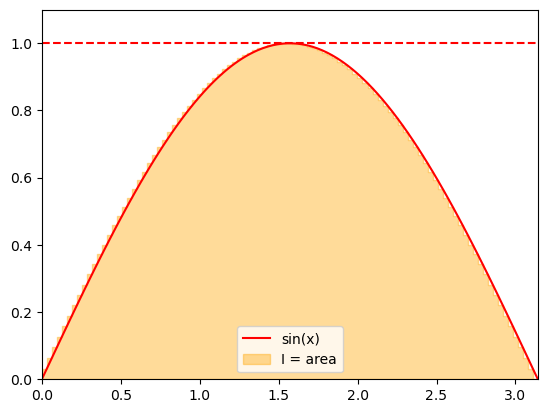

In [2]:
def f(x):
    return np.sin(x)

xplot = np.linspace(0,np.pi, 100)
yplot = f(xplot)

plt.xlim(0,np.pi)
plt.ylim(0,1.1)
plt.plot(xplot, yplot,color='r',label="sin(x)")
plt.fill_between(xplot, yplot, step="pre", alpha = 0.4, color='orange',label="I = area")
plt.axhline(1.0,linestyle='--', color='r')
plt.legend()
plt.show()

We can estimate the area by sampling the points uniformly from an enveloping rectangle and counting the fraction of points under the curve given by the integrand $f(x)$.

Assuming an integral

$$
I = \int_a^b f(x) dx
$$

where $f(x) \geq 0$ and $f(x) \leq y_{\rm max}$, the integral can be evaluated as

$$
I = (b-a) \cdot y_{\rm max} \frac{C}{N},
$$

where $C$ is the number of the sampled points that fall under $f(x)$.

The statistical error of the integral can be estimated using the properties of the binomial distribution with acceptance probability $p = C/N$:

$$
\delta I = (b-a) \cdot y_{\rm max} \sqrt{\frac{p(1-p)}{N}}
$$

I =  1.9854865570687492  +-  0.04791067848807569


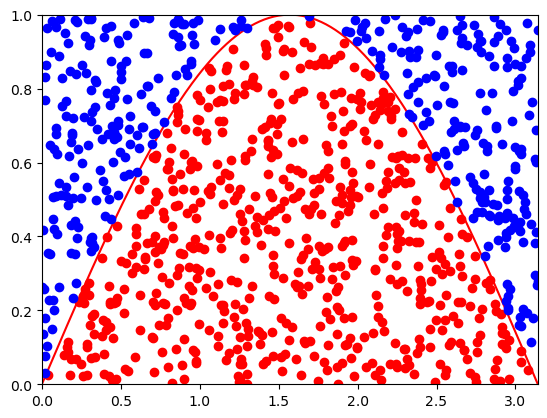

In [3]:
# For visualization
points_in = []
points_out = []

# Compute integral \int_a^b f(x) dx as an area below the curve
# Assumes that f(x) is non-negative and bounded from above by ymax
# Returns the value of the integral and the error estimate
def areaMC(f, N, a, b, ymax):
    global points_in, points_out
    points_in = []
    points_out = []
    count = 0
    for i in range(N):
        x = a + (b-a)*np.random.rand()
        y = ymax * np.random.rand()
        if y<f(x):
            count += 1
            points_in.append([x,y])
        else:
            points_out.append([x,y])
    p = count/N
    return (b-a) * ymax * p, (b-a) * ymax * np.sqrt(p*(1-p)/N)
        
# Function to integrate
def f(x):
    return np.sin(x)

# Number of samples
N = 1000

# Compute the integral
I, err = areaMC(f, N, 0, np.pi, 1)
print("I = ",I," +- ",err)

# Plot the result
xpoints = np.arange(0,np.pi,0.01)
plt.xlim(0,np.pi)
plt.ylim(0,1)
plt.plot(xpoints, f(xpoints),color='r')
x1 = [x[0] for x in points_in]
y1 = [x[1] for x in points_in]
plt.plot(x1,y1,'o',color='r')
x2 = [x[0] for x in points_out]
y2 = [x[1] for x in points_out]
plt.plot(x2,y2,'o',color='b')
plt.show()

## Computing  $\pi$ using Monte Carlo

Consider a circle of a unit radius $r = 1$. Its area is

$$
A = \pi r^2 = \pi
$$

The circle can be embedded into a square with the side length of two.
The area of the square is $A_{\rm sq} = 2^2 = 4$.

Consider now a random point anywhere inside the square. The probability that it is also inside the circle corresponds to the ratio of their areas

$$
P = \frac{A}{A_{\rm sq}} = \frac{\pi}{4}.
$$

This probability can be estimated by sampling the points inside the square many times and counting how many of them are inside circle. $\pi$ can therefore be estimated as

$$
\pi = 4 \frac{A}{A_{\rm sq}}
$$

pi =  3.108  +-  0.052652977123805636


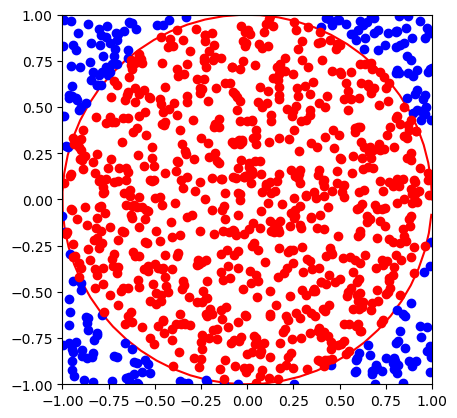

In [4]:
# Compute the value of \pi through the fraction of random points inside a square
# that are also inside a circle around the origin
# Returns the value of the integral and the error estimate
def piMC(N):    
    global points_in, points_out
    points_in = []
    points_out = []
    count = 0
    for i in range(N):
        x = -1 + 2 * np.random.rand()
        y = -1 + 2 * np.random.rand()
        r2 = x**2 + y**2
        if (r2 < 1.):
            count += 1
            points_in.append([x,y])
        else:
            points_out.append([x,y])
    p = count/N
    return 4. * p, 4. * np.sqrt(p*(1-p)/N)
        
# Compute the value of pi
N = 1000
piMC, piMCerr = piMC(N)
print("pi = ",piMC," +- ",piMCerr)

# Visualize the result
xpoints = np.arange(0,np.pi,0.01)
plt.xlim(-1,1)
plt.ylim(-1,1)

xcircle= [np.cos(phi) for phi in np.arange(0.,2*np.pi,0.1)]
ycircle= [np.sin(phi) for phi in np.arange(0.,2*np.pi,0.1)]
plt.plot(xcircle,ycircle,color='r')

x2 = [x[0] for x in points_out]
y2 = [x[1] for x in points_out]
plt.plot(x2,y2,'o',color='b')
x1 = [x[0] for x in points_in]
y1 = [x[1] for x in points_in]
plt.plot(x1,y1,'o',color='r')
plt.gca().set_aspect('equal')
plt.show()

## Integral as Monte Carlo average

The integral

$$
I = \int_a^b f(x) dx
$$

can be written as

\begin{align*}
I & = (b-a) \int_a^b \frac{1}{b-a} f(x) dx \\
& = (b-a) \int_a^b \rho(x) f(x) dx \\
& = (b-a) \langle f \rangle
\end{align*}

where $\rho(x) = \frac{1}{b-a}$ is the probability density function of uniform distribution over $(a,b)$ and $\langle f \rangle$ is the mean value of $f(x)$ over $(a,b)$

$$
\langle f \rangle = \frac{\int_a^b f(x) dx}{b - a} = \frac{I}{b-a},
$$

Therefore, the integral can be expressed in terms of the mean value $\langle f \rangle$

$$
I = (b-a) \langle f \rangle
$$

and estimated by evaluating $\langle f \rangle$ as the average value of $f(x)$ obtained through random sampling of the variable $x$ uniformly over the interval $(a,b)$:

$$
\langle f \rangle = \frac{1}{N} \sum_{i=1}^N f(x_i).
$$

The error estimate comes from the law of averages and involves the estimate of $\langle f^2 \rangle$

$$
\delta I = (b-a) \sqrt{\frac{\langle f^2 \rangle - \langle f \rangle^2}{N}}
$$

In [5]:
# Compute integral \int_a^b f(x) dx as an average of f(x) over the interval (a,b)
# Returns the value of the integral and the error estimate
def intMC(f, N, a, b):
    total = 0
    total_sq = 0
    for i in range(N):
        x = a + (b-a)*np.random.rand()
        fval = f(x)
        total += fval
        total_sq += fval * fval
    f_av = total / N
    fsq_av = total_sq / N 
    return (b-a) * f_av, (b-a) * np.sqrt((fsq_av - f_av*f_av)/N)
        
# Function to integrate
def f(x):
    return np.sin(x)

# Number of samples
N = 1000

# Compute the integral
I, err = intMC(f, N, 0, np.pi)
print("I = ",I," +- ",err)

I =  1.9564976399681653  +-  0.03122840681767477


## Another way to compute $\pi$

Consider the following integral
$$
4 \int_0^1 \frac{1}{1+x^2} dx = \left. 4 \arctan(x) \right|^1_0 = \pi
$$

This integral can be computed using Monte Carlo integration and thus provides estimate of $\pi$.

In [6]:
def fpi(x):
    return 4 / (1 + x**2)

N = 1000
I, err = intMC(fpi, N, 0, 1)
print("pi = ",I," +- ",err)

pi =  3.157544663550486  +-  0.019840055791278573


## Integrals in multiple dimensions

Monte Carlo methods really shine when it comes to numerical evaluation of integrals in multiple dimensions.
Consider the following $D$-dimensional integral

$$
I = \int_{a_1}^{b_1} d x_1 \ldots \int_{a_D}^{b_D} d x_D f(x_1,\ldots,x_D).
$$

Computing it numerically using, for instance, the rectangle rule would involve the evaluation of multi-dimensional sum

$$
I \approx \sum_{k_1 = 1}^{N_1} \ldots \sum_{k_D = 1}^{N_D} f(x_{k_1},\ldots,x_{k_D}) \prod_{d=1}^D h_d,
$$

where $h_d = (b_d - a_d)/N_d$ and $x_{k_d} = a_d + h_d (k_d - 1/2)$.

The total number of integrand evaluations is $N_{\rm tot} = \prod_{d=1}^D N_D$, e.g. if we use the same number $N$ of points in each dimension, it scales exponentially with $D$,

$$
N_{\rm tot} = N^D,
$$

making the method impractical for large number of dimensions.
This problem is often referred to as the "curse of dimensionality".

Let us illustrate this problem with a simple example using the rectangle rule.

In [7]:
# Composite rectangle rule for evaluating a multi-dimensional integral
def rectangle_rule_multi(f, Nrect, a, b):
    xks = []
    hs = []
    toth = 1
    dim = len(Nrect)
    
    multi_index_max = 1
    for idim in range(dim):
        multi_index_max *= Nrect[idim]
        h = (b[idim] - a[idim]) / Nrect[idim]
        hs.append(h)
        toth *= h
        xk = []
        for k in range(Nrect[idim]):
            xk.append(a[idim] + h * (k - 1./2.))
        xks.append(xk)
        
    ret = 0.
    for multiindex in range(multi_index_max):
        cindex = multiindex
        x = []
        for idim in range(dim):
            index = cindex % Nrect[idim]
            x.append(xks[idim][index])
            cindex = cindex // Nrect[idim]
        
        ret += f(x)
    
    ret *= toth
    
    return ret

Let us now consider the following integral as an example
$$
I = \int_0^{\pi/2} d x_1 \ldots \int_{0}^{\pi/2} d x_D \, \sin(x_1 + x_2 + \ldots + x_D).
$$

We can evaluate this integral analytically through an iterative procedure for any finite $D$.
The first few results are

| D | I = |
| -------- | -------- |
| 1 | 1  |
| 2 | 2  |
| 3 | 2  |
| 4 | 0  |
| 5 | -4  |
| 6 | -8  |

Applying the rectangle rule we get

In [8]:
%%time

def f(x):
    xsum = 0
    for i in range(len(x)):
        xsum += x[i]
    return np.sin(xsum)

Ndimmax = 4

for Ndim in range(1,Ndimmax + 1):
    Nrect = [50 for i in range(Ndim)]
    a = [0. for i in range(Ndim)]
    b = [np.pi/2 for i in range(Ndim)]
    I = rectangle_rule_multi(f,Nrect,a,b)
    print("D =",Ndim, " I =",I)

D = 1  I = 0.9681356137777438
D = 2  I = 1.9962176337747817
D = 3  I = 2.1796094400043926
D = 4  I = 0.5014154076818487
CPU times: user 6.87 s, sys: 11.7 ms, total: 6.89 s
Wall time: 6.89 s


We can only make $N$ so large when we go to higher dimensions without calculations becoming unfeasible.
As a result, calculating the integral for $D \gtrsim 4$ even with moderate accuracy becomes challenging.

### The Monte Carlo way 

Monte Carlo techniques, on the other hand, are not plagued by the curse of dimensionality.
The integral can be approximated by computing the mean value of the integrand in $D$-dimensional space

$$
I = \langle f(x_1,\ldots,x_D) \rangle \prod_{k=1}^D (b_k-a_k).
$$

Here $x_1,\ldots,x_D$ are independent random variables distributed uniformly in intervals $x_k \in [a_k,b_k]$.
Adding one more dimension thus only entails sampling one more number for each sample.
Thus the complexity of the method is linear in $D$ as opposed to the exponential complexity of other methods.

Error estimate:

$$
\delta I = \sqrt{\frac{\langle f^2 \rangle - \langle f \rangle^2}{N}} \, \prod_{k=1}^D (b_k-a_k),
$$

scales with $1/\sqrt{N}$ as before.

We see that, for the same number of samples $N$, the complexity of Monte Carlo integration scales linearly with $D$, which is much better than the exponential scaling of classical methods.

In [9]:
# Evaluating a multi-dimensional integral
# by sampling uniformly distributed numbers
# and calculating the average of the integrand
def intMC_multi(f, nMC, a, b):
    dim = len(a)
    
    total = 0
    total_sq = 0
    for iMC in range(nMC):
        x = [a[idim] + (b[idim] - a[idim]) * np.random.rand() for idim in range(dim)]
        fval = f(x)
        total += fval
        total_sq += fval * fval
        
    f_av = total / nMC
    fsq_av = total_sq / nMC 
    
    vol = 1.
    for idim in range(dim):
        vol *= (b[idim] - a[idim])
        
    return vol * f_av, vol * np.sqrt((fsq_av - f_av*f_av)/nMC)

Let us evaluate our integral up to $D = 10$ dimensions

In [10]:
%%time

def f(x):
    xsum = 0
    for i in range(len(x)):
        xsum += x[i]
    return np.sin(xsum)

Ndimmax = 10
NMC = 1000000
for Ndim in range(1,Ndimmax + 1):
    a = [0. for i in range(Ndim)]
    b = [np.pi/2 for i in range(Ndim)]
    I, Ierr = intMC_multi(f,NMC,a,b)
    print("D =",Ndim, " I =",I,"+-",Ierr)

D = 1  I = 1.0008114435470552 +- 0.00048320938495628876
D = 2  I = 2.0010256649249167 +- 0.0005263358606042537
D = 3  I = 2.000246652145913 +- 0.0018726369882186475
D = 4  I = -0.0018397149497273988 +- 0.003936428854490009
D = 5  I = -3.9948751787330963 +- 0.005450474371896811
D = 6  I = -8.003830428368088 +- 0.007506943051958106
D = 7  I = -8.012641841947563 +- 0.014635031918387699
D = 8  I = 0.027700961378249817 +- 0.02583573227516957
D = 9  I = 16.0553088144787 +- 0.037913593086241794
D = 10  I = 32.0941749810499 +- 0.056582362503310384
CPU times: user 22.8 s, sys: 178 ms, total: 22.9 s
Wall time: 23 s


### Volume of a D-dimensional ball

Let us consider an $D$-dimensional ball of radius $R$.
Its volume is given by an $D$-dimensional integral

$$
V_D(R) = \int_{\sqrt{x_1^2+\ldots x_{D}^2} < R} d x_1 \ldots d x_D.
$$

This can be written with the recursion formula

$$
V_D(R) =  R^D \int_{-1}^1 V_{D-1} \left(\sqrt{1-t^2} \right) dt,
$$

with $V_0(R) = 1$.

Let us use the rectangle method to evalute this integral for $R = 1$.
Once again, we will have to use rectangle method recursively since the integral is multi-dimensional.

In [11]:
# Computes volume of a D-dimensional ball
# using a recursion relation and rectangle rule
# with nrect slices for each dimension
def VD(D, R, nrect):
    if (D == 0):
        return 1.
    
    ret = 0.
    h = 2. / nrect;
    for k in range(nrect):
        xk = -1. + h * (k+1/2.)
        ret += VD(D-1,np.sqrt(1-xk**2), nrect)
    ret *= h * R**D
    return ret

The calculation:

In [12]:
%%time

nrect = 50
for n in range(5):
    print("V",n,"(1) = ",VD(n,1,nrect))

V 0 (1) =  1.0
V 1 (1) =  2.0
V 2 (1) =  3.144340711294003
V 3 (1) =  4.193292772581682
V 4 (1) =  4.940233310235603
CPU times: user 3.26 s, sys: 55.6 ms, total: 3.32 s
Wall time: 3.32 s


The calculation, again, quickly becomes untenable in larger dimensions

This can be overcome with Monte Carlo techniques.

Here we observe that the ball $\sqrt{x_1^2+\ldots x_{n}^2} < R$ is a subvolume of a hypercube $-R < x_1,\ldots,x_D < R$.
If we will now randomly sample points that are uniformly distributed inside a hypercube,
the fraction $C/N$ of those that are also inside the ball will reflect
the ratio of the ball and hypercube volumes $V_D(R)$ and $V_{\rm cube} (R) = (2R)^D$.
Therefore,

$$
V_D(R) = (2R)^D \frac{C}{N},
$$

in the limit of large $N$.

In [13]:
def VD_MC(D, R, N = 100):
    if (D == 0):
        return 1., 0., 1.
    count = 0
    for iMC in range(N):
        xs = [-R + 2 * R * np.random.rand() for i in range(D)]
        r2 = 0.
        for i in range (D):
            r2 += xs[i]**2
        if (r2 < R**2):
            count += 1
        
    p = count/N
    return (2*R)**D * p, (2*R)**D * np.sqrt(p*(1-p)/N), p

Let us evaluate up to $D = 15$ dimensions using 500,000 Monte Carlo samples for each dimension.

V 0 (1) =  1.0 +- 0.0
V 1 (1) =  2.0 +- 0.0
V 2 (1) =  3.14012 +- 0.0023238443947906666
V 3 (1) =  4.196864 +- 0.005649999038142219
V 4 (1) =  4.926368 +- 0.010445361298545494
V 5 (1) =  5.272576 +- 0.016788232445628336
V 6 (1) =  5.194496 +- 0.02471699639138963
V 7 (1) =  4.734976 +- 0.03416597518817292
V 8 (1) =  3.989504 +- 0.04484187511320159
V 9 (1) =  3.41504 +- 0.0589378992126187
V 10 (1) =  2.572288 +- 0.07249008547994762
V 11 (1) =  1.851392 +- 0.08704278446444985
V 12 (1) =  1.302528 +- 0.1032807640251486
V 13 (1) =  0.868352 +- 0.11927099856045556
V 14 (1) =  0.65536 +- 0.14654002008509756
V 15 (1) =  0.262144 +- 0.13107147571095143


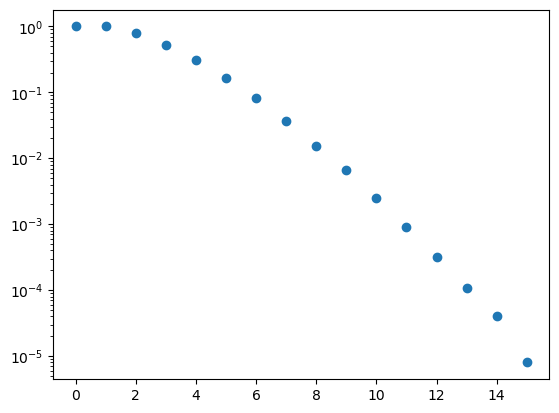

CPU times: user 21.2 s, sys: 315 ms, total: 21.5 s
Wall time: 21.2 s


In [14]:
%%time

nMC = 500000
ds = []
ps = []
for n in range(16):
    Vnval, Vnerr, p = VD_MC(n, 1, nMC)
    print("V",n,"(1) = ",Vnval, "+-", Vnerr)
    ds.append(n)
    ps.append(p)
    
plt.plot(ds,ps,"o")
plt.yscale("log")
plt.show()

Monte Carlo integration provides a feasible way to evaluate integrals in high dimensions. 
One does observe that the error increases with the dimensionality of the integration.
This reflects the fact that the volume of the sphere relative to that of the hypercube decreases with the dimensionality, meaning that the integration region becomes sparser.
This issue can be mitigated by using importance sampling, which we will cover later.